In [1]:
from Utility05_Bayesian import *
# from bayes_opt import BayesianOptimization
from tiramisu_net import *
import scipy.io
import cv2
import multiprocessing

Using TensorFlow backend.


In [2]:
Model_set_id=1

In [3]:
def make_di_path(path_name):
    try:
        os.mkdir(path_name)
    except OSError:
        print ("Creation of the directory %s failed" % path_name)
    else:
        print ("Successfully created the directory %s " % path_name)    

In [4]:
path_name="case_study_models"+'\\'+'Model set-'+str(Model_set_id).zfill(2)
make_di_path(path_name)
Model_dir=path_name+'\\'

Creation of the directory case_study_models\Model set-01 failed


In [5]:
import os, shutil
folder = Model_dir
for the_file in os.listdir(folder):
    file_path = os.path.join(folder, the_file)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
        #elif os.path.isdir(file_path): shutil.rmtree(file_path)
    except Exception as e:
        print(e)

## Structure data

In [6]:
dataset_x = np.load('Zheng_data.npz')
X_data=dataset_x['a']
Y_data=dataset_x['b']
print(X_data.shape)
print(Y_data.shape)
n_obs_Z=X_data.shape[0]

(57, 180, 320, 3)
(57, 180, 320)


## Inference

In [7]:
import tensorflow.keras
import tensorflow as tf

In [8]:
class Model:
    @staticmethod
    def loadmodel(path):
        return load_model(path)

    def __init__(self, path):
        self.model = self.loadmodel(path)
        self.graph = tf.get_default_graph()

    def predict(self, X):
        with self.graph.as_default():
            return self.model.predict(X)

In [9]:
main_model=Model('test.h5')
SRG_model=Model('test_SRG.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [10]:
def Monty_Model_softmax_X(X,model, N_MCS):
    SoftMaxBin_list=[]
    for i in range(N_MCS):
        SoftMaxBin_list.append(model.predict(X))
    SoftMaxBin=np.array(SoftMaxBin_list)
    
    SoftmaxMean=np.mean(SoftMaxBin,axis=0)
    SoftmaxStd=np.std(SoftMaxBin,axis=0)

    return SoftmaxMean,SoftmaxStd

### Visualization

In [11]:
import time

N_MCS_main=20
N_MCS_SRG=1
N_MCS=20

Obs. 1 processed, t_load: 0.000, t_MCS: 0.574, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.096 t_sum= 0.674 (s)


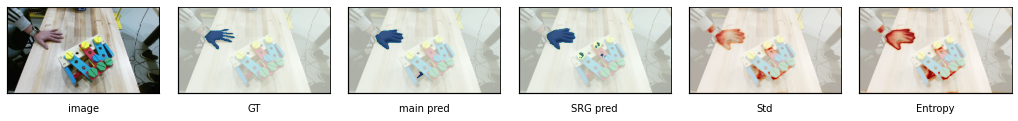

Obs. 2 processed, t_load: 0.000, t_MCS: 0.539, t_ENTP: 0.003, t_inSRG: 0.002, t_SRG: 0.096 t_sum= 0.640 (s)


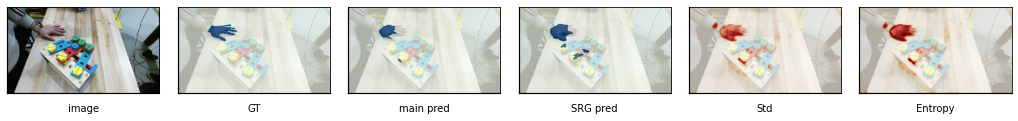

Obs. 3 processed, t_load: 0.000, t_MCS: 0.527, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.095 t_sum= 0.625 (s)


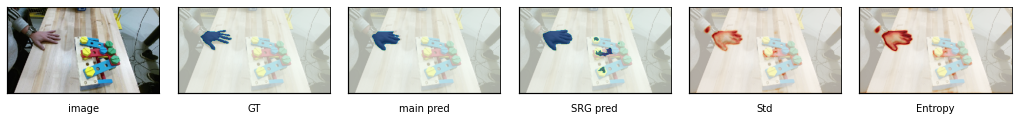

Obs. 4 processed, t_load: 0.000, t_MCS: 0.556, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.101 t_sum= 0.661 (s)


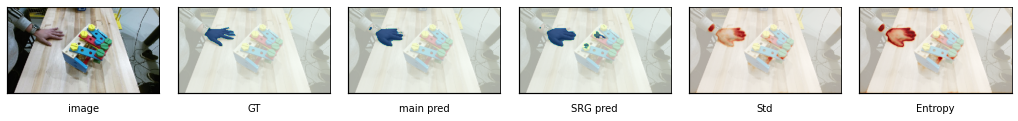

Obs. 5 processed, t_load: 0.000, t_MCS: 0.284, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.017 t_sum= 0.305 (s)


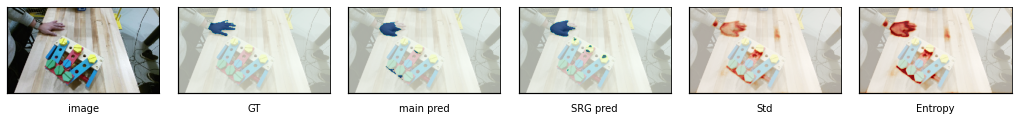

Obs. 6 processed, t_load: 0.000, t_MCS: 0.230, t_ENTP: 0.003, t_inSRG: 0.002, t_SRG: 0.015 t_sum= 0.250 (s)


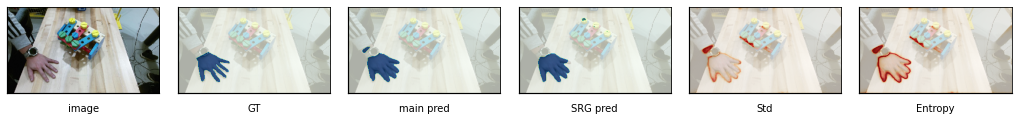

Obs. 7 processed, t_load: 0.000, t_MCS: 0.230, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.250 (s)


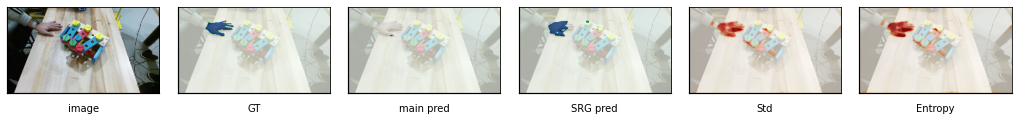

Obs. 8 processed, t_load: 0.000, t_MCS: 0.221, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.015 t_sum= 0.240 (s)


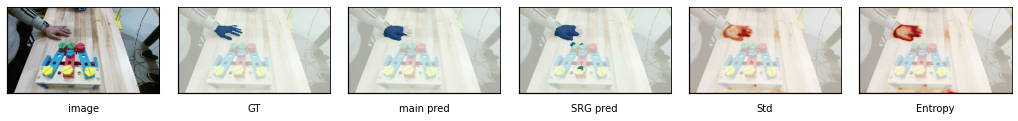

Obs. 9 processed, t_load: 0.000, t_MCS: 0.229, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.015 t_sum= 0.248 (s)


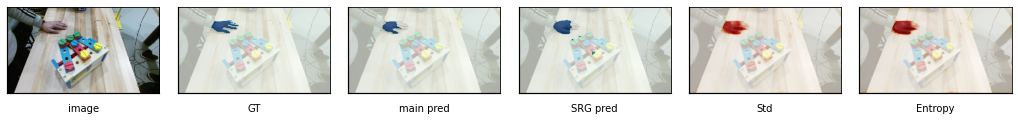

Obs. 10 processed, t_load: 0.000, t_MCS: 0.229, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.015 t_sum= 0.248 (s)


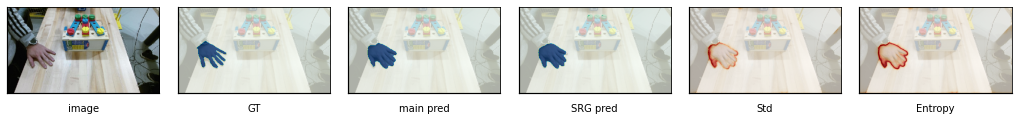

Obs. 11 processed, t_load: 0.000, t_MCS: 0.248, t_ENTP: 0.003, t_inSRG: 0.003, t_SRG: 0.016 t_sum= 0.271 (s)


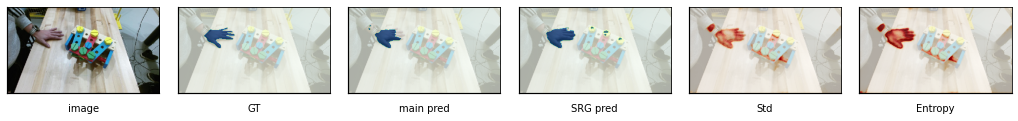

Obs. 12 processed, t_load: 0.000, t_MCS: 0.261, t_ENTP: 0.004, t_inSRG: 0.003, t_SRG: 0.017 t_sum= 0.285 (s)


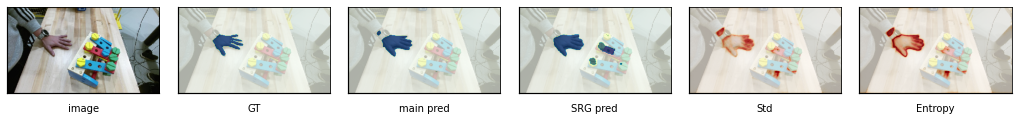

Obs. 13 processed, t_load: 0.000, t_MCS: 0.235, t_ENTP: 0.003, t_inSRG: 0.001, t_SRG: 0.015 t_sum= 0.255 (s)


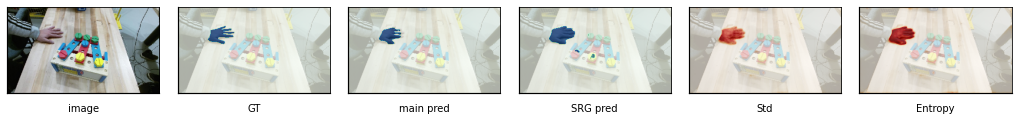

Obs. 14 processed, t_load: 0.000, t_MCS: 0.234, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.253 (s)


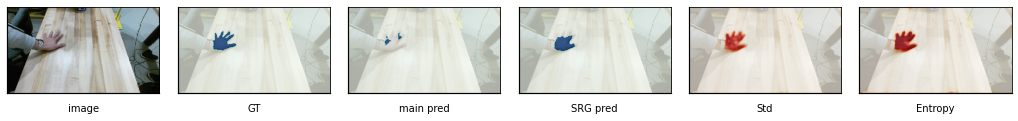

Obs. 15 processed, t_load: 0.000, t_MCS: 0.214, t_ENTP: 0.003, t_inSRG: 0.002, t_SRG: 0.015 t_sum= 0.234 (s)


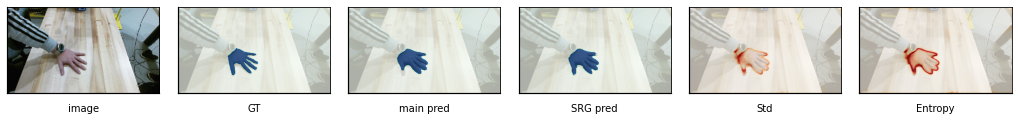

Obs. 16 processed, t_load: 0.000, t_MCS: 0.226, t_ENTP: 0.003, t_inSRG: 0.001, t_SRG: 0.016 t_sum= 0.246 (s)


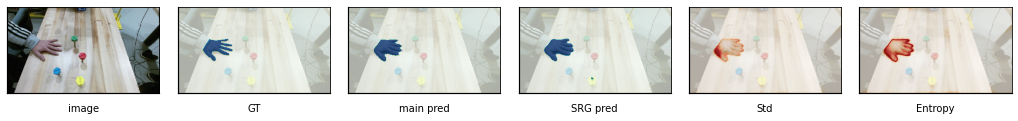

Obs. 17 processed, t_load: 0.000, t_MCS: 0.245, t_ENTP: 0.006, t_inSRG: 0.003, t_SRG: 0.017 t_sum= 0.271 (s)


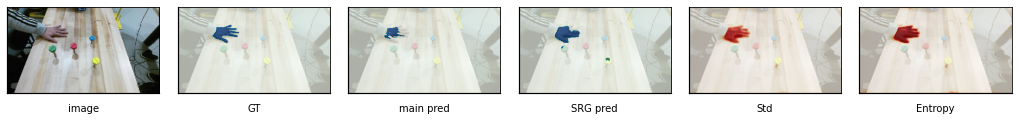

Obs. 18 processed, t_load: 0.000, t_MCS: 0.234, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.018 t_sum= 0.256 (s)


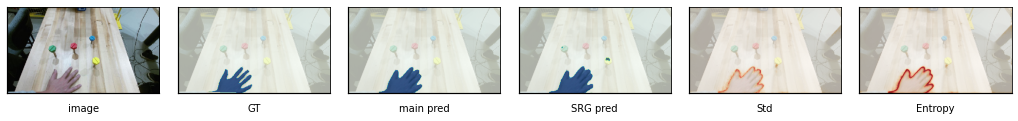

Obs. 19 processed, t_load: 0.000, t_MCS: 0.240, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.261 (s)


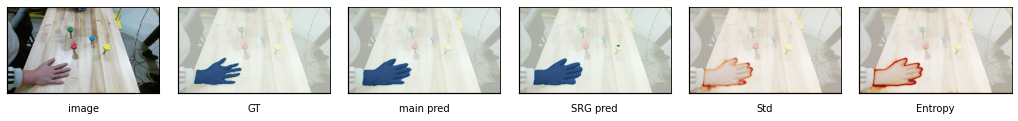

Obs. 20 processed, t_load: 0.000, t_MCS: 0.228, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.015 t_sum= 0.247 (s)


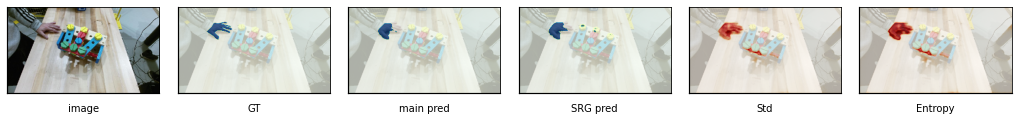

Obs. 21 processed, t_load: 0.000, t_MCS: 0.229, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.017 t_sum= 0.250 (s)


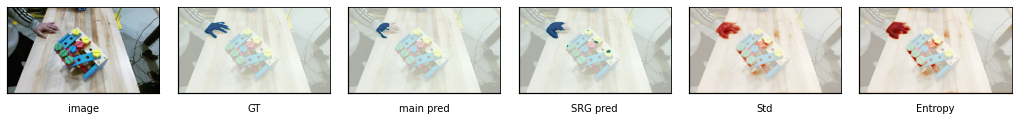

Obs. 22 processed, t_load: 0.000, t_MCS: 0.253, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.273 (s)


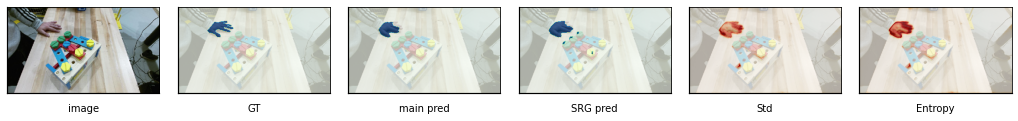

Obs. 23 processed, t_load: 0.000, t_MCS: 0.217, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.237 (s)


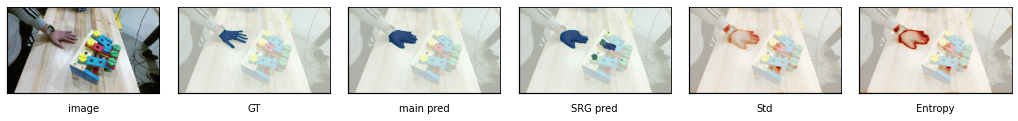

Obs. 24 processed, t_load: 0.000, t_MCS: 0.230, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.249 (s)


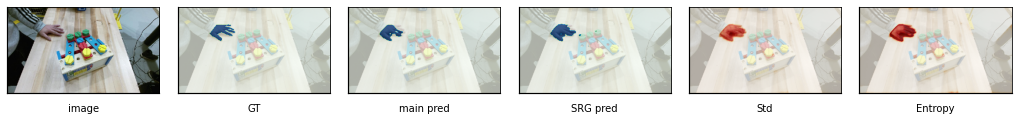

Obs. 25 processed, t_load: 0.000, t_MCS: 0.227, t_ENTP: 0.003, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.248 (s)


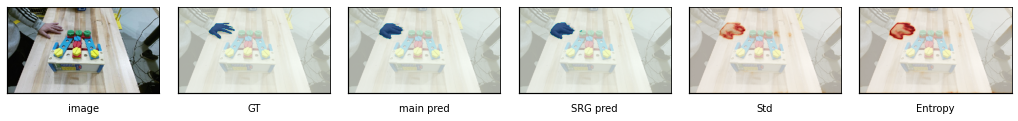

Obs. 26 processed, t_load: 0.000, t_MCS: 0.236, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.015 t_sum= 0.255 (s)


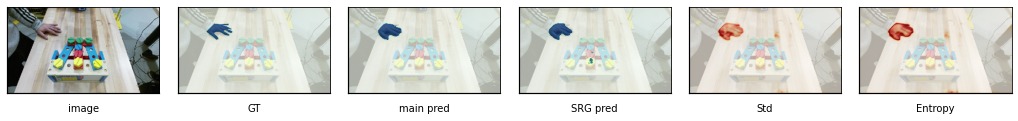

Obs. 27 processed, t_load: 0.000, t_MCS: 0.237, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.257 (s)


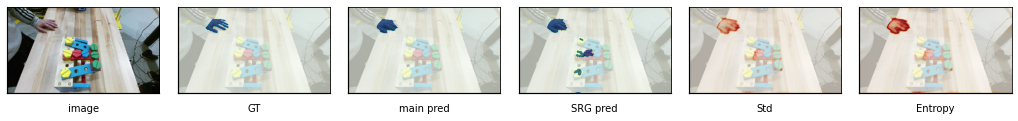

Obs. 28 processed, t_load: 0.000, t_MCS: 0.236, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.256 (s)


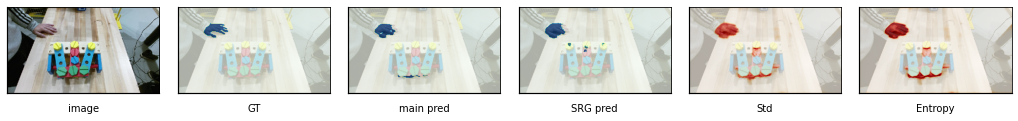

Obs. 29 processed, t_load: 0.000, t_MCS: 0.228, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.017 t_sum= 0.249 (s)


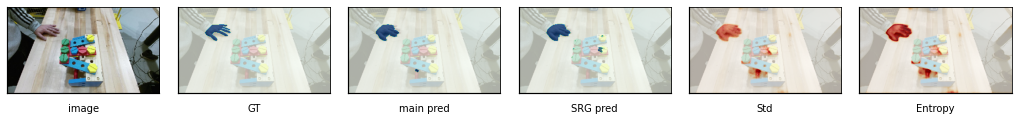

Obs. 30 processed, t_load: 0.000, t_MCS: 0.226, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.245 (s)


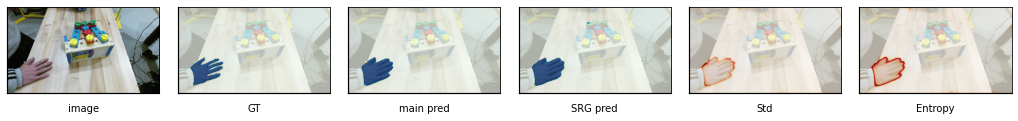

Obs. 31 processed, t_load: 0.000, t_MCS: 0.230, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.014 t_sum= 0.248 (s)


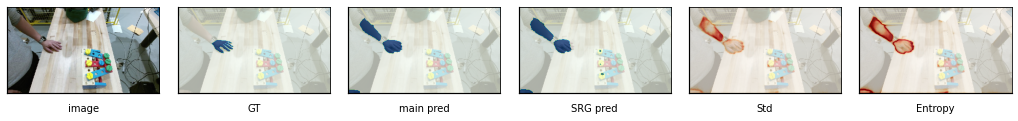

Obs. 32 processed, t_load: 0.000, t_MCS: 0.230, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.250 (s)


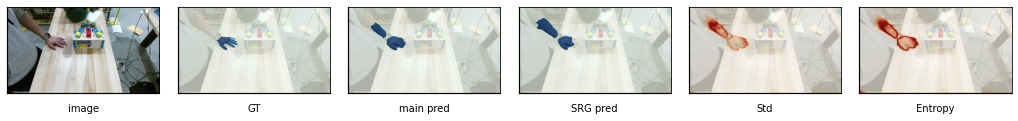

Obs. 33 processed, t_load: 0.000, t_MCS: 0.226, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.015 t_sum= 0.245 (s)


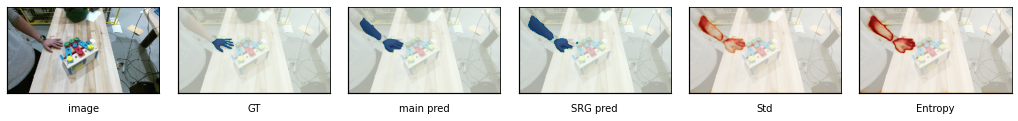

Obs. 34 processed, t_load: 0.000, t_MCS: 0.227, t_ENTP: 0.003, t_inSRG: 0.001, t_SRG: 0.016 t_sum= 0.247 (s)


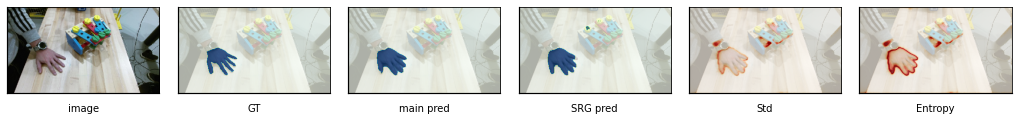

Obs. 35 processed, t_load: 0.000, t_MCS: 0.246, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.266 (s)


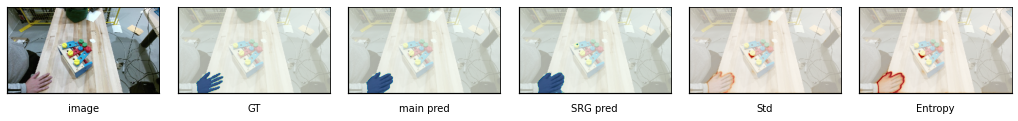

Obs. 36 processed, t_load: 0.000, t_MCS: 0.242, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.015 t_sum= 0.261 (s)


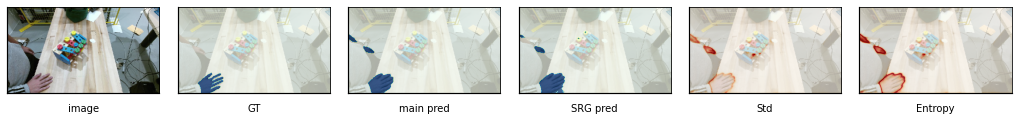

Obs. 37 processed, t_load: 0.000, t_MCS: 0.283, t_ENTP: 0.008, t_inSRG: 0.005, t_SRG: 0.023 t_sum= 0.319 (s)


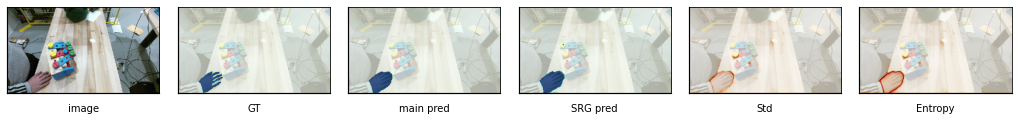

Obs. 38 processed, t_load: 0.000, t_MCS: 0.264, t_ENTP: 0.003, t_inSRG: 0.002, t_SRG: 0.017 t_sum= 0.286 (s)


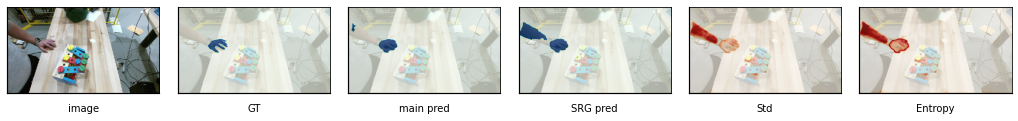

Obs. 39 processed, t_load: 0.000, t_MCS: 0.331, t_ENTP: 0.008, t_inSRG: 0.005, t_SRG: 0.019 t_sum= 0.363 (s)


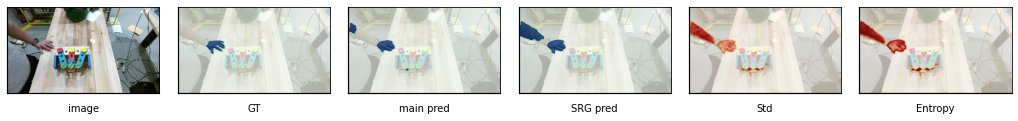

Obs. 40 processed, t_load: 0.000, t_MCS: 0.244, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.015 t_sum= 0.263 (s)


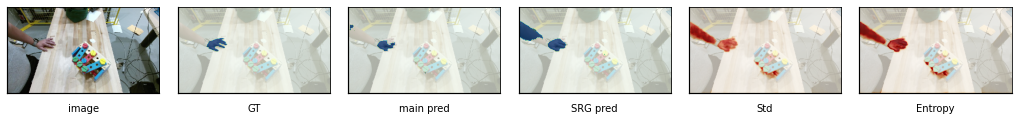

Obs. 41 processed, t_load: 0.000, t_MCS: 0.233, t_ENTP: 0.003, t_inSRG: 0.001, t_SRG: 0.016 t_sum= 0.253 (s)


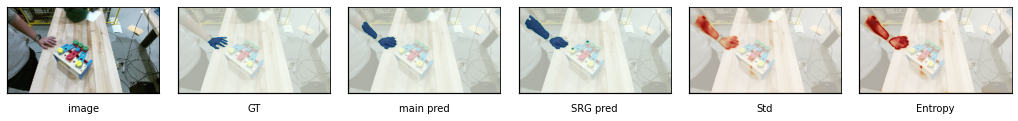

Obs. 42 processed, t_load: 0.000, t_MCS: 0.228, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.248 (s)


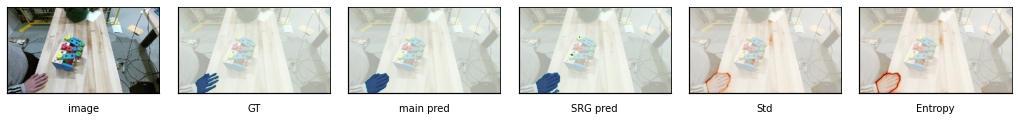

Obs. 43 processed, t_load: 0.000, t_MCS: 0.236, t_ENTP: 0.003, t_inSRG: 0.002, t_SRG: 0.015 t_sum= 0.256 (s)


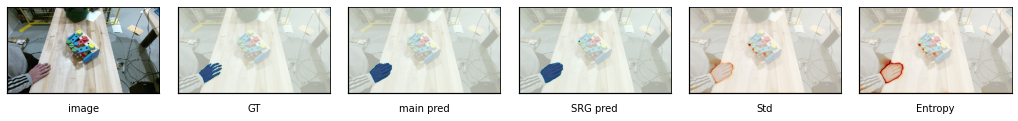

Obs. 44 processed, t_load: 0.000, t_MCS: 0.240, t_ENTP: 0.003, t_inSRG: 0.003, t_SRG: 0.019 t_sum= 0.265 (s)


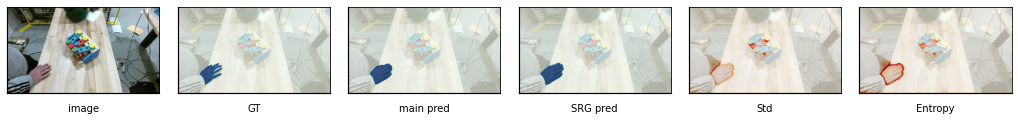

Obs. 45 processed, t_load: 0.000, t_MCS: 0.237, t_ENTP: 0.003, t_inSRG: 0.001, t_SRG: 0.016 t_sum= 0.257 (s)


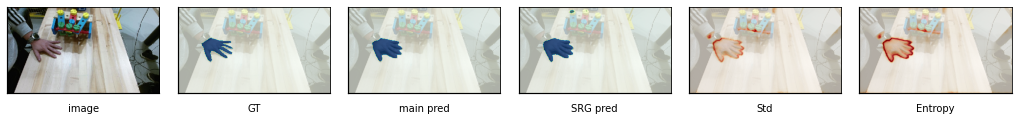

Obs. 46 processed, t_load: 0.000, t_MCS: 0.232, t_ENTP: 0.003, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.253 (s)


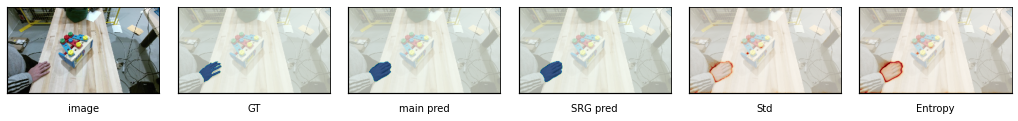

Obs. 47 processed, t_load: 0.000, t_MCS: 0.253, t_ENTP: 0.002, t_inSRG: 0.004, t_SRG: 0.021 t_sum= 0.280 (s)


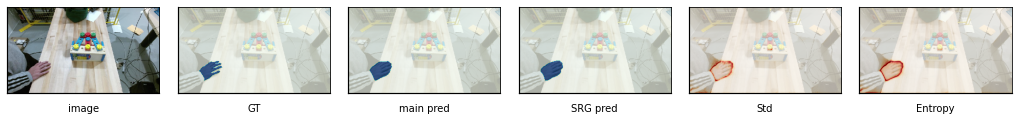

Obs. 48 processed, t_load: 0.000, t_MCS: 0.232, t_ENTP: 0.003, t_inSRG: 0.002, t_SRG: 0.017 t_sum= 0.254 (s)


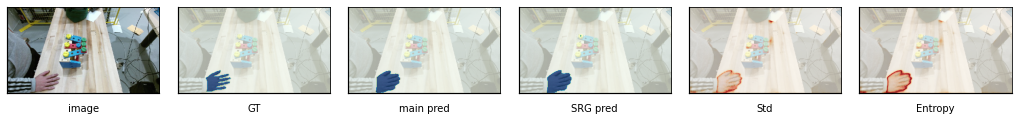

Obs. 49 processed, t_load: 0.000, t_MCS: 0.253, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.273 (s)


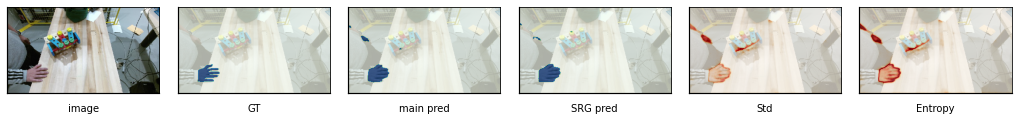

Obs. 50 processed, t_load: 0.000, t_MCS: 0.224, t_ENTP: 0.003, t_inSRG: 0.001, t_SRG: 0.015 t_sum= 0.243 (s)


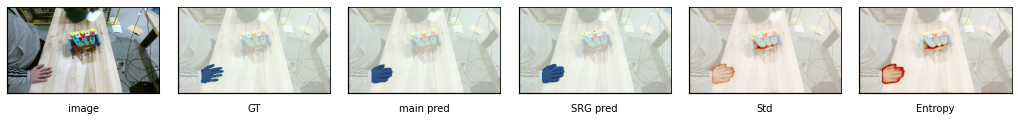

Obs. 51 processed, t_load: 0.000, t_MCS: 0.240, t_ENTP: 0.003, t_inSRG: 0.002, t_SRG: 0.015 t_sum= 0.260 (s)


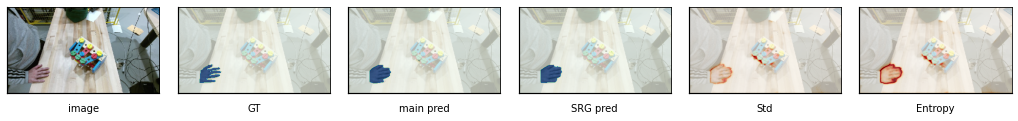

Obs. 52 processed, t_load: 0.000, t_MCS: 0.225, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.245 (s)


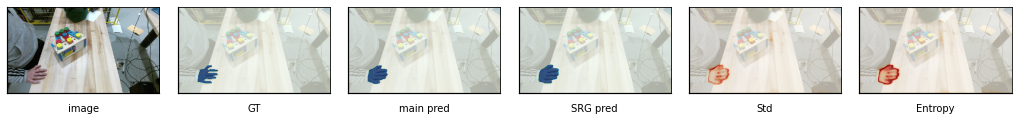

Obs. 53 processed, t_load: 0.000, t_MCS: 0.247, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.267 (s)


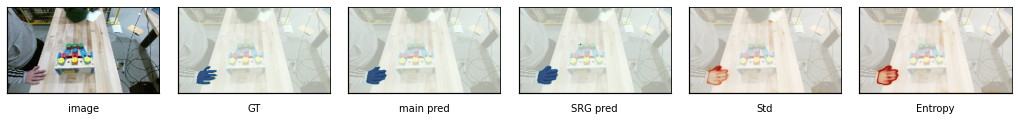

Obs. 54 processed, t_load: 0.000, t_MCS: 0.251, t_ENTP: 0.003, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.272 (s)


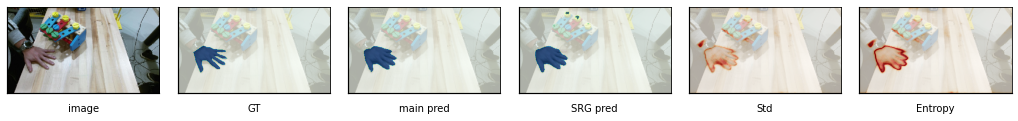

Obs. 55 processed, t_load: 0.000, t_MCS: 0.235, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.016 t_sum= 0.255 (s)


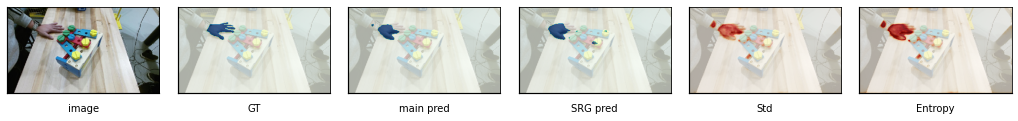

Obs. 56 processed, t_load: 0.000, t_MCS: 0.278, t_ENTP: 0.004, t_inSRG: 0.002, t_SRG: 0.025 t_sum= 0.310 (s)


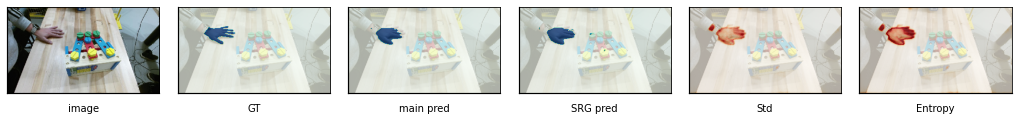

Obs. 57 processed, t_load: 0.000, t_MCS: 0.248, t_ENTP: 0.002, t_inSRG: 0.002, t_SRG: 0.022 t_sum= 0.274 (s)


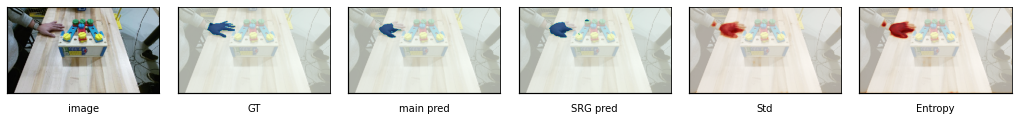

In [17]:
t_bin=[]

alpha=0.7
SoftmaxMean_SRG=[]

for i_obs in np.arange(0,n_obs_Z,1):
    
    t0 = time.time() ## initiate data loading 
    mask_i,img_i = Y_data[i_obs,:],X_data[i_obs,:]
    img_i=img_i.reshape((1,)+img_i.shape)
    mask_i=mask_i.reshape((1,)+mask_i.shape)
   
    t1 = time.time() ## initiate MCS
    SoftmaxMean_main_i,SoftmaxStd_main_i=Monty_Model_softmax_X(img_i,main_model, N_MCS_main)
    
    
    
    t2 = time.time() ## entropy calcs

    p_c=SoftmaxMean_main_i
    max_p=np.sum(SoftmaxMean_main_i,axis=-1)
    max_p=np.reshape(max_p,max_p.shape+(1,))
    p_c_norm=np.divide(p_c,max_p)
    log_p_c=np.log10(p_c_norm+1e-12)
    entropy_i=np.sum(np.multiply(-1*p_c_norm,log_p_c),axis=-1)

    t3 = time.time() ## save to file
    SoftmaxStd_main_i=SoftmaxStd_main_i.reshape(1,180,320,2)
    SoftmaxMean_main_i=SoftmaxMean_main_i.reshape(1,180,320,2)
    entropy_i=entropy_i.reshape((1,180,320,1))
    X_SRG=np.concatenate((img_i,SoftmaxMean_main_i,SoftmaxStd_main_i,entropy_i),axis=-1) 

    y_pred_main=np.argmax(SoftmaxMean_main_i,axis=-1)
    
    # np.savez_compressed(set_dir+'/X_SRG_'+str(i_obs+1)+'.npz',X_SRG=X_SRG)

    t4 = time.time() ## Initiate second inference
    
    SoftmaxMean_SRG_i,SoftmaxStd_SRG_i=Monty_Model_softmax_X(X_SRG,SRG_model, N_MCS_SRG)
    
    y_pred_SRG=np.argmax(SoftmaxMean_SRG_i,axis=-1).reshape(1,180,320)
    
    t5 = time.time() ## End of inference 
    
    # times
    dt_1=t1-t0  # load data
    dt_2=t2-t1  # perform MCS
    dt_3=t3-t2  # measure entropy
    dt_4=t4-t3  # Build SRG input
    dt_5=t5-t4  # SRG inference
    t_sum=t5-t0
    SoftmaxMean_SRG.append(SoftmaxMean_SRG_i)
    t_bin.append([dt_1,dt_2,dt_3,dt_4,dt_5])
    print('Obs. %d processed, t_load: %1.3f, t_MCS: %1.3f, t_ENTP: %1.3f, t_inSRG: %1.3f, t_SRG: %1.3f t_sum= %1.3f (s)'%((i_obs+1,dt_1,dt_2,dt_3,dt_4,dt_5,t_sum)))
    
    fig,ax = plt.subplots(1,6,figsize=(18,3))
    plt.subplots_adjust(wspace=0.12, hspace=0.1)
    
    for i in range(6):
        ax[i].spines['top'].set_visible(1.2)
        ax[i].spines['right'].set_visible(1.2)
        ax[i].spines['bottom'].set_linewidth(1.2)
        ax[i].spines['left'].set_linewidth(1.2)
        ax[i].set_yticklabels([])
        ax[i].set_xticklabels([])
        ax[i].tick_params(bottom=False, left=False)
    
    ax[0].imshow(img_i[0])
    ax[0].set_xlabel('image')

    ax[1].imshow(img_i[0])
    ax[1].imshow(mask_i[0],alpha=alpha,cmap='GnBu')
    ax[1].set_xlabel('GT')
    
    ax[2].imshow(img_i[0])
    ax[2].imshow(y_pred_main[0],alpha=alpha,cmap='GnBu')
    ax[2].set_xlabel('main pred')

    ax[3].imshow(img_i[0])
    ax[3].imshow(y_pred_SRG[0],alpha=alpha,cmap='GnBu')
    ax[3].set_xlabel('SRG pred')
    
    ax[4].imshow(img_i[0])
    ax[4].imshow(SoftmaxStd_main_i[0,:,:,1],alpha=alpha,cmap='OrRd')
    ax[4].set_xlabel('Std')    
    
    ax[5].imshow(img_i[0])
    ax[5].imshow(entropy_i[0,:,:,0],alpha=alpha,cmap='OrRd')
    ax[5].set_xlabel('Entropy')    
    
    
    plot_save_name='test_save_zheng/'+str(i_obs+1).zfill(3)+'.png'
    fig.savefig(plot_save_name,dpi=150, pad_inches=0.1,bbox_inches='tight',facecolor='white')   
    
    plt.show()
    plt.close()

In [18]:
SoftmaxMean_test_main,SoftmaxStd_test_main = Monty_Model_softmax_X(X_data,main_model, N_MCS=20)

In [19]:
def Models_eval_hands_B(SoftmaxMean,y_get_set,save_fname):
    
    Y_pred=np.argmax(SoftmaxMean,axis=-1).reshape(-1,180,320)
    # precision, recall, f1
    prc_bin, rec_bin, f1_bin, _ =precision_recall_fscore_support(y_get_set.ravel(), Y_pred.ravel())
    # calculate entropy
    p_c=SoftmaxMean
    max_p=np.sum(SoftmaxMean,axis=-1)
    max_p=np.reshape(max_p,max_p.shape+(1,))
    p_c_norm=np.divide(p_c,max_p)
    log_p_c=np.log10(p_c_norm+1e-12)
    entropy=np.sum(np.multiply(-1*p_c_norm,log_p_c),axis=-1)
    
    # IoU
    classes=np.unique(y_get_set)
    nClasses=len(classes)
    IoU_bin=[]

    Mask_GT=y_get_set
    Mask_Prd=Y_pred

    for i in range(nClasses):
        
        GT_class_cond=(Mask_GT==classes[i])
        Prd_class_cond=(Mask_Prd==classes[i])
        # Measure IoU
        intersection=np.logical_and(GT_class_cond,Prd_class_cond)
        union=np.logical_or(GT_class_cond,Prd_class_cond)
        
        IoU_class = np.sum(intersection) / np.sum(union) 
        IoU_bin.append(IoU_class)    
    
    print('           Background    Hands')
    print('Precision:    %1.4f      %1.4f'%(prc_bin[0]*100,prc_bin[1]*100))
    print('Recall:       %1.4f      %1.4f'%(rec_bin[0]*100,rec_bin[1]*100))
    print('F1-score:     %1.4f      %1.4f'%(f1_bin[0]*100,f1_bin[1]*100))
    print('IoU:          %1.4f      %1.4f'%(IoU_bin[0]*100,IoU_bin[1]*100))
            
    # save to file 
    np.savez_compressed(save_fname+'.npz',prc_bin=prc_bin, rec_bin=rec_bin, f1_bin=f1_bin, IoU_bin=IoU_bin)
    

In [20]:
# main model

In [25]:
Models_eval_hands_B(SoftmaxMean_test_main,Y_data,'test_metrics')

           Background    Hands
Precision:    99.7163      75.1019
Recall:       99.3787      86.8914
F1-score:     99.5472      80.5677
IoU:          99.0985      67.4588


In [23]:
# SRG model

In [24]:
Models_eval_hands_B(SoftmaxMean_SRG,Y_data,'test_metrics')

           Background    Hands
Precision:    99.8429      66.5673
Recall:       98.9949      92.7800
F1-score:     99.4171      77.5176
IoU:          98.8410      63.2888
